## Question-1
Given a Binary Tree (Bt), convert it to a Doubly Linked List(DLL). The left and right pointers in nodes are to be used as previous and next pointers respectively in converted DLL. The order of nodes in DLL must be the same as in Inorder for the given Binary Tree. The first node of Inorder traversal (leftmost node in BT) must be the head node of the DLL.
example:                                                                                                        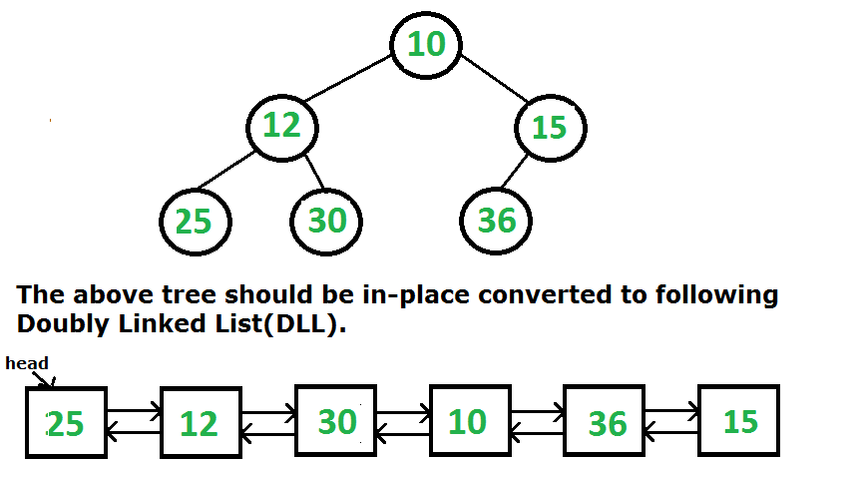                                                                       

In [3]:
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None


class DLLNode:
    def __init__(self, data):
        self.data = data
        self.prev = None
        self.next = None


def binary_tree_to_dll(root):
    def convert_to_dll(node):
        nonlocal head, prev

        if node is None:
            return

        convert_to_dll(node.left)


        dll_node = DLLNode(node.data)

        # Set the head of the DLL
        if head is None:
            head = dll_node

    
        dll_node.prev = prev
        if prev:
            prev.next = dll_node

        prev = dll_node
        
        
        convert_to_dll(node.right)

    head = None
    prev = None
    convert_to_dll(root)
    return head



root = TreeNode(10)
root.left = TreeNode(12)
root.right = TreeNode(15)
root.left.left = TreeNode(25)
root.left.right = TreeNode(30)
root.right.left = TreeNode(36)


dll_head = binary_tree_to_dll(root)

# Traversing the DLL
current = dll_head
while current:
    print(current.data, end=" ")
    current = current.next

25 12 30 10 36 15 

## Question-2

A Given a binary tree, the task is to flip the binary tree towards the right direction that is clockwise. See the below examples to see the transformation.

In the flip operation, the leftmost node becomes the root of the flipped tree and its parent becomes its right child and the right sibling becomes its left child and the same should be done for all left most nodes recursively.

Example1: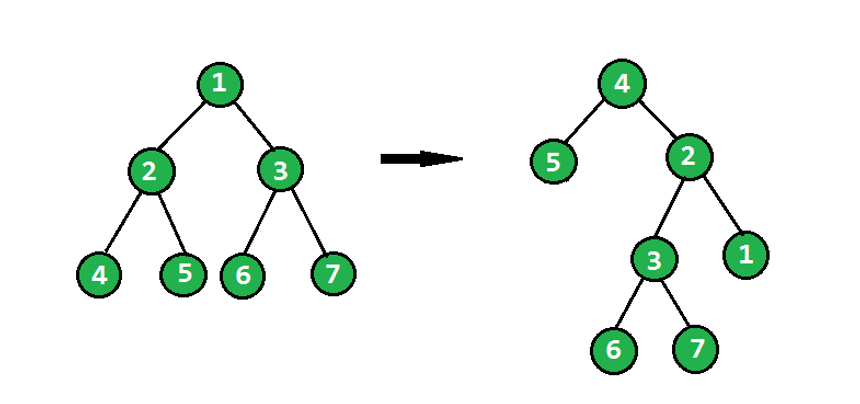

In [7]:
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None


def flip_binary_tree(root):
    if root is None or (root.left is None and root.right is None):
        return root

    flipped_left = flip_binary_tree(root.left)
    flipped_right = flip_binary_tree(root.right)

    root.left = flipped_right
    root.right = flipped_left

    return root


def print_preorder(root):
    if root is None:
        return
    print(root.data, end=" ")
    print_preorder(root.left)
    print_preorder(root.right)

root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)


flipped_root = flip_binary_tree(root)
print_preorder(flipped_root)

1 3 7 6 2 5 4 

## Question-3:

Given a binary tree, print all its root-to-leaf paths without using recursion. For example, consider the following Binary Tree.

Input:
```
        6
     /    \
    3      5
  /   \     \ 
 2     5     4
     /   \
    7     4
```
Output:

There are 4 leaves, hence 4 root to leaf paths -
 ``` 6->3->2
  6->3->5->7
  6->3->5->4
  6->5>4
  ```


In [8]:
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None


def print_root_to_leaf_paths(root):
    if root is None:
        return

    stack = [(root, [])]
    paths = []

    while stack:
        node, path = stack.pop()

        path.append(str(node.data))

        if node.left is None and node.right is None:
            paths.append(path)

        if node.right:
            stack.append((node.right, path.copy()))
        if node.left:
            stack.append((node.left, path.copy()))

    for path in paths:
        print("->".join(path))



root = TreeNode(6)
root.left = TreeNode(3)
root.right = TreeNode(5)
root.left.left = TreeNode(2)
root.left.right = TreeNode(5)
root.right.right = TreeNode(4)
root.left.right.left = TreeNode(7)
root.left.right.right = TreeNode(4)


print_root_to_leaf_paths(root)

6->3->2
6->3->5->7
6->3->5->4
6->5->4


##  Question-4:

Given Preorder, Inorder and Postorder traversals of some tree. Write a program to check if they all are of the same tree.

**Examples:**

Input : 

        Inorder -> 4 2 5 1 3
        Preorder -> 1 2 4 5 3
        Postorder -> 4 5 2 3 1
Output : 

Yes

Explanation : 

All of the above three traversals are of
the same tree 
```
                           1
                         /   \
                        2     3
                      /   \
                     4     5
```
Input : 
```
        Inorder -> 4 2 5 1 3
        Preorder -> 1 5 4 2 3
        Postorder -> 4 1 2 3 5
```
Output : 

No


In [12]:
def are_traversals_same(preorder, inorder, postorder):
    if len(preorder) == 0:
        return len(inorder) == 0 and len(postorder) == 0

    if preorder[0] != postorder[-1]:
        return "No"

    root = preorder[0]
    root_index = inorder.index(root)

    left_inorder = inorder[:root_index]
    right_inorder = inorder[root_index + 1:]

    left_preorder = preorder[1:1 + len(left_inorder)]
    right_preorder = preorder[1 + len(left_inorder):]

    left_postorder = postorder[:len(left_inorder)]
    right_postorder = postorder[len(left_inorder):-1]

    return are_traversals_same(left_preorder, left_inorder, left_postorder) and \
           are_traversals_same(right_preorder, right_inorder, right_postorder)


# i/p 1
preorder1 = [1, 2, 4, 5, 3]
inorder1 = [4, 2, 5, 1, 3]
postorder1 = [4, 5, 2, 3, 1]
print(are_traversals_same(preorder1, inorder1, postorder1))
# Output: Yes

# i/p 2
preorder2 = [1, 5, 4, 2, 3]
inorder2 = [4, 2, 5, 1, 3]
postorder2 = [4, 1, 2, 3, 5]
print(are_traversals_same(preorder2, inorder2, postorder2))

True
No
